In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import baselines
import get_movie_name as steven

In [5]:
from surprise import AlgoBase, Dataset, BaselineOnly, Reader, SVD, SVDpp, SlopeOne, NMF, NormalPredictor, KNNBaseline, KNNBasic, KNNWithMeans, KNNWithZScore, BaselineOnly, CoClustering
from surprise.model_selection import cross_validate, train_test_split

In [48]:
movies = pd.read_csv('../data/movies/movies.csv')
ratings = pd.read_csv('../data/movies/ratings.csv')

In [6]:
def myround(x, base=.5):
    return base * round(x/base)

In [7]:
cv = baselines.cvWrapper(pd.read_csv('../data/movies/ratings.csv'))
cv.load_data()

In [10]:
algorithm_list = [baselines.MeanOfMeans(), SVD(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]
cv.cv(algorithm_list)

{'test_rmse': array([0.95507406, 0.94476454, 0.95756662]), 'fit_time': (0.48581576347351074, 0.4767191410064697, 0.4576759338378906), 'test_time': (0.5223779678344727, 0.4527139663696289, 0.45771193504333496)}
appended to benchmark
{'test_rmse': array([0.90125624, 0.90083693, 0.90757486]), 'fit_time': (3.609005928039551, 3.4581170082092285, 3.322399854660034), 'test_time': (0.26305270195007324, 0.23095178604125977, 0.22210121154785156)}
appended to benchmark
{'test_rmse': array([0.93863019, 0.93622129, 0.93916994]), 'fit_time': (3.3107750415802, 4.170080900192261, 3.2250030040740967), 'test_time': (6.63703727722168, 7.024074077606201, 6.9465491771698)}
appended to benchmark
{'test_rmse': array([0.96016275, 0.96806378, 0.96094443]), 'fit_time': (3.689873218536377, 3.665911912918091, 3.672898769378662), 'test_time': (0.2314901351928711, 0.20957708358764648, 0.21060919761657715)}
appended to benchmark
{'test_rmse': array([1.43362017, 1.43305786, 1.43706728]), 'fit_time': (0.06980872154235

In [40]:
benchmark = cv.benchmark_df

In [41]:
benchmark = benchmark.reset_index()

In [42]:
benchmark.Algorithm = benchmark.Algorithm.replace({'BaselineOnly': 'ALS'})

In [44]:
def highlight_max(s):
    return 'background-color: yellow'

In [43]:
benchmark

,Algorithm,test_rmse,fit_time,test_time
0,ALS,0.897455,0.144492,0.177721
1,SVD,0.903223,3.463174,0.238702
2,KNNBaseline,0.905374,0.237191,2.700851
3,KNNWithMeans,0.927028,0.105676,2.223263
4,KNNWithZScore,0.927576,0.180095,2.497656
5,SlopeOne,0.938007,3.568620,6.869220
6,MeanOfMeans,0.952468,0.473404,0.477601
7,NMF,0.963057,3.676228,0.217225
8,CoClustering,0.970698,1.594496,0.200133
9,KNNBasic,0.979814,0.097770,2.148179


In [45]:
benchmark = benchmark.style.apply(lambda x: ['background: lightgreen' if x.name in [0,6] 
                              else '' for i in x], 
                   axis=1)

In [46]:
benchmark

,Algorithm,test_rmse,fit_time,test_time
0,ALS,0.897455,0.144492,0.177721
1,SVD,0.903223,3.46317,0.238702
2,KNNBaseline,0.905374,0.237191,2.70085
3,KNNWithMeans,0.927028,0.105676,2.22326
4,KNNWithZScore,0.927576,0.180095,2.49766
5,SlopeOne,0.938007,3.56862,6.86922
6,MeanOfMeans,0.952468,0.473404,0.477601
7,NMF,0.963057,3.67623,0.217225
8,CoClustering,0.970698,1.5945,0.200133
9,KNNBasic,0.979814,0.09777,2.14818


In [78]:
bsl_options = {'method': 'als',
                    'n_epochs': 5,
                    'reg_u': 12,
                    'reg_i': 5
                }
algo_als = BaselineOnly(bsl_options=bsl_options)

In [79]:
cv.split_train_predict(algo_als)

Estimating biases using als...


In [80]:
cv1 = baselines.cvWrapper(pd.read_csv('../data/movies/ratings.csv'))
cv1.load_data()
algo_mom = baselines.MeanOfMeans()

In [81]:
cv1.split_train_predict(algo_mom)

In [23]:
als_predictions = cv.predictions
als_trainset = cv.trainset
als_testset = cv.testset

In [24]:
als_predictions

[Prediction(uid=421, iid=293, r_ui=1.0, est=3.841553876913343, details={'was_impossible': False}),
 Prediction(uid=598, iid=2078, r_ui=4.0, est=3.559878394772494, details={'was_impossible': False}),
 Prediction(uid=505, iid=539, r_ui=3.5, est=2.9511057816821684, details={'was_impossible': False}),
 Prediction(uid=463, iid=1372, r_ui=4.0, est=3.079637822521509, details={'was_impossible': False}),
 Prediction(uid=128, iid=239, r_ui=3.0, est=3.642178631050449, details={'was_impossible': False}),
 Prediction(uid=354, iid=232, r_ui=5.0, est=4.172051470821862, details={'was_impossible': False}),
 Prediction(uid=270, iid=113741, r_ui=3.5, est=3.5308483804750765, details={'was_impossible': False}),
 Prediction(uid=322, iid=1608, r_ui=2.0, est=3.483905000011045, details={'was_impossible': False}),
 Prediction(uid=585, iid=922, r_ui=5.0, est=4.716532681644834, details={'was_impossible': False}),
 Prediction(uid=292, iid=339, r_ui=3.5, est=3.7769478907789424, details={'was_impossible': False}),
 

In [25]:
mom_predictions = cv1.predictions
mom_trainset = cv1.trainset
mom_testset = cv1.testset

In [26]:
als_df = pd.DataFrame(als_predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])

In [31]:
als_df[als_df.rui == None]

,uid,iid,rui,est,details


In [17]:
mom_df = pd.DataFrame(mom_predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])

In [10]:
als_df['Iu'] = als_df.uid.apply(lambda x: baselines.get_Iu(x, als_trainset))
als_df['Ui'] = als_df.iid.apply(lambda x: baselines.get_Ui(x, als_trainset))
als_df['err'] = abs(als_df.est - als_df.rui)

In [18]:
mom_df['Iu'] = mom_df.uid.apply(lambda x: baselines.get_Iu(x, mom_trainset))
mom_df['Ui'] = mom_df.iid.apply(lambda x: baselines.get_Ui(x, mom_trainset))
mom_df['err'] = abs(mom_df.est - mom_df.rui)

In [12]:
als_df['iid'] = als_df.iid.apply(lambda x: steven.get_movie_names(x)[0])

In [19]:
mom_df['iid'] = mom_df.iid.apply(lambda x: steven.get_movie_names(x)[0])

In [30]:
als_best = als_df.sort_values(by='err')[:100]
mom_best = mom_df.sort_values(by='err')[:100]
als_worst = als_df.sort_values(by='err')[-100:]
mom_worst = mom_df.sort_values(by='err')[-100:]

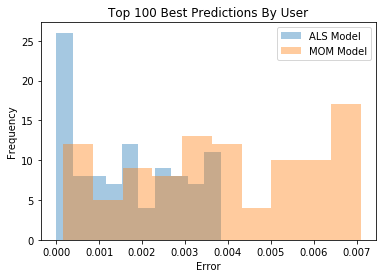

In [29]:
plt.hist(als_best.err, label = 'ALS Model', alpha=0.4)
plt.hist(mom_best.err, label = 'MOM Model', alpha=0.4)
plt.title("Top 100 Best Predictions By User")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.legend()

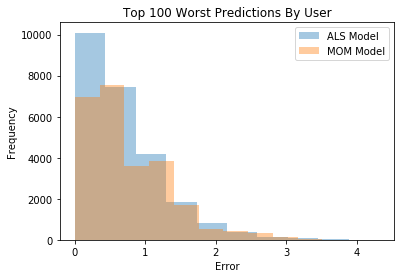

In [34]:
plt.hist(als_df.err, label = 'ALS Model', alpha=0.4)
plt.hist(mom_df.err, label = 'MOM Model', alpha=0.4)
plt.title("Top 100 Worst Predictions By User")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.legend()

In [116]:
als_df['est_mapped'] = als_df.est.apply(lambda x: 1 if myround(x) >=3.5 else 0)
als_df['rui_mapped'] = als_df.rui.apply(lambda x: 1 if myround(x) >=3.5 else 0)

mom_df['est_mapped'] = mom_df.est.apply(lambda x: 1 if myround(x) >=3.5 else 0)
mom_df['rui_mapped'] = mom_df.rui.apply(lambda x: 1 if myround(x) >=3.5 else 0)

In [117]:
als_fps = als_df[(als_df.est_mapped == 1) & (als_df.rui_mapped == 0)].shape[0]
mom_fps = mom_df[(mom_df.est_mapped == 1) & (mom_df.rui_mapped == 0)].shape[0]

als_tps = als_df[(als_df.est_mapped == 1) & (als_df.rui_mapped == 1)].shape[0]
mom_tps = mom_df[(mom_df.est_mapped == 1) & (mom_df.rui_mapped == 1)].shape[0]

In [118]:
als_fps, mom_fps

(4688, 6936)

In [119]:
mom_precision = mom_tps/(mom_tps + mom_fps)
als_precision = als_tps/(als_tps + als_fps)

In [120]:
mom_precision

0.6824757370444974

In [121]:
als_precision

0.7403057832927099

Text(0.05,0.95,'The ALS Difference')

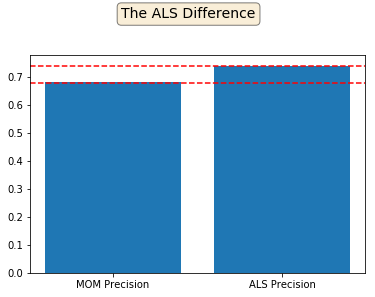

In [136]:
plt.bar(['MOM Precision', 'ALS Precision'],[mom_precision, als_precision])
plt.axhline(y=0.74, linestyle='--', color='red')
plt.axhline(y=0.68, linestyle='--', color='red')

textstr = 'The ALS Difference'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 0.95, textstr, fontsize=14,
        verticalalignment='top', bbox=props)


In [91]:
bsl_options = {'method': 'als',
                    'n_epochs': 5,
                    'reg_u': 12,
                    'reg_i': 5
                }
algo = BaselineOnly(bsl_options=bsl_options)

In [93]:
predictions = algo.fit(als_trainset).test(als_testset)

Estimating biases using als...


In [94]:
title_xref = movies[['movieId','title']]
rats = ratings.merge(title_xref, on='movieId', how='inner')
rats = rats.drop('timestamp', axis = 1)
dat = rats[['userId','title','rating']]

In [95]:
def top_rated_movies(df, uid, num):
   top_df = df[df.userId == uid].sort_values('rating', ascending = False).head(num)
   return list(top_df.index), list(top_df.title)

In [ ]:
predlist = []
for user in dat.userId.unique():
   for movie in dat.title.unique():
       predlist.append(list(algo.predict(uid = user, iid = movie)))

In [85]:
pred_df = pd.DataFrame(predlist, columns = ['userId','title','r_ui','est','junk'])

In [86]:
pred_df

,userId,title,r_ui,est,junk
0,1,Dangerous Minds (1995),None,3.019043,{'was_impossible': False}
1,1,Dumbo (1941),None,3.019043,{'was_impossible': False}
2,1,Sleepers (1996),None,3.019043,{'was_impossible': False}
3,1,Escape from New York (1981),None,3.019043,{'was_impossible': False}
4,1,Cinema Paradiso (Nuovo cinema Paradiso) (1989),None,3.019043,{'was_impossible': False}
...,...,...,...,...,...
6081939,227,Pathology (2008),None,3.735603,{'was_impossible': False}
6081940,227,"Box, The (2009)",None,3.735603,{'was_impossible': False}
6081941,227,Pie in the Sky (1996),None,3.735603,{'was_impossible': False}
6081942,227,Summer Catch (2001),None,3.735603,{'was_impossible': False}


In [71]:
pred_df[pred_df['userId'] == 1].sort_values(by='est')

,userId,title,r_ui,est,junk
0,1,Dangerous Minds (1995),None,2.872192,{'was_impossible': False}
6051,1,Simply Irresistible (1999),None,2.872192,{'was_impossible': False}
6050,1,Suspicion (1941),None,2.872192,{'was_impossible': False}
6049,1,Dance with Me (1998),None,2.872192,{'was_impossible': False}
6048,1,"Incredible Journey, The (1963)",None,2.872192,{'was_impossible': False}
...,...,...,...,...,...
3022,1,"Return of Jafar, The (1994)",None,2.872192,{'was_impossible': False}
3023,1,Autumn Sonata (Höstsonaten) (1978),None,2.872192,{'was_impossible': False}
3024,1,Baraka (1992),None,2.872192,{'was_impossible': False}
3018,1,"Flintstones in Viva Rock Vegas, The (2000)",None,2.872192,{'was_impossible': False}
